In [3]:
import os
from torch.utils.data import DataLoader
from dataloader_e2e import create_dataset_12
import matplotlib.pyplot as plt
from PIL import ImageOps
import torchvision
import numpy as np
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:
rand=torch.randperm(12).tolist()
rand

[5, 0, 7, 6, 3, 2, 11, 10, 8, 9, 1, 4]

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [35]:
path = os.getcwd()
path = '/root/notebooks/sample/dataset/ECG100_224/'

#path = '/root/notebooks/data/ECG100_224_re/'

In [36]:
train_dataloader,test_dataloader,label_lead=create_dataset_12(path,32,None)

print(train_dataloader)
print(test_dataloader)
print(label_lead.shape)
print(labels.shape)

Classification lab : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3, 'Normal': 4}
Number of datas 378
torch.Size([12, 378, 3, 112, 224])
378
378
torch.Size([378, 12])


AttributeError: 'list' object has no attribute 'shape'

In [10]:
def imshow_allimage(img,num,title,xlabel):
    img = torchvision.utils.make_grid(img,nrow=num)
    npimg = img.to('cpu').detach().numpy().copy()
    plt.figure(figsize=(20,20))
    plt.title(title)
    plt.xlabel(xlabel)
    im=np.transpose(npimg, (1,2,0))
    plt.imshow(im)
    plt.show()

In [11]:
def imshow_oneimage(img,label_lead,patients):
    print(label_lead)
    fig = plt.figure(figsize=(32,4),dpi=400)
    fig.suptitle(patients,fontsize=20)
    img = img.to('cpu').detach().numpy().copy()
    X = 1
    Y = 6
    img1 = np.transpose(img[0],(1,2,0))
    ax1 = fig.add_subplot(X, Y, 1)
    ax1.set_title(label_lead[0],fontsize=20)
    ax1.axis("off")
    plt.imshow(img1)
    img2 = np.transpose(img[1],(1,2,0))
    ax2 = fig.add_subplot(X, Y, 2)
    ax2.set_title(label_lead[1],fontsize=20)
    ax2.axis("off")
    plt.imshow(img2)
    img3 = np.transpose(img[2],(1,2,0))
    ax3 = fig.add_subplot(X, Y, 3)
    ax3.set_title(label_lead[2],fontsize=20)
    ax3.axis("off")
    plt.imshow(img3)
    img4 = np.transpose(img[3],(1,2,0))
    ax4 = fig.add_subplot(X, Y, 4)
    ax4.set_title(label_lead[3],fontsize=20)
    ax4.axis("off")
    plt.imshow(img4)
    img5 = np.transpose(img[4],(1,2,0))
    ax5 = fig.add_subplot(X, Y, 5)
    ax5.set_title(label_lead[4],fontsize=20)
    ax5.axis("off")
    plt.imshow(img5)
    img6 = np.transpose(img[5],(1,2,0))
    ax6 = fig.add_subplot(X, Y, 6)
    ax6.set_title(label_lead[5],fontsize=20)
    ax6.axis("off")
    plt.imshow(img6)


In [12]:
for counter, (images,_,label_lead,_,_) in enumerate(train_dataloader, 0):
    print(images.shape)
    #print(labels)
    print(label_lead.shape)
    #print(patients)
    #print(num_leads)
    #imgs=images.reshape(-1,3,112,224)
    #imshow_allimage(imgs,6,'title','allimage')
    break

torch.Size([32, 12, 3, 112, 224])
torch.Size([32, 12])


[6, 9, 5, 7, 0, 11, 4, 3, 10, 8, 2, 1]


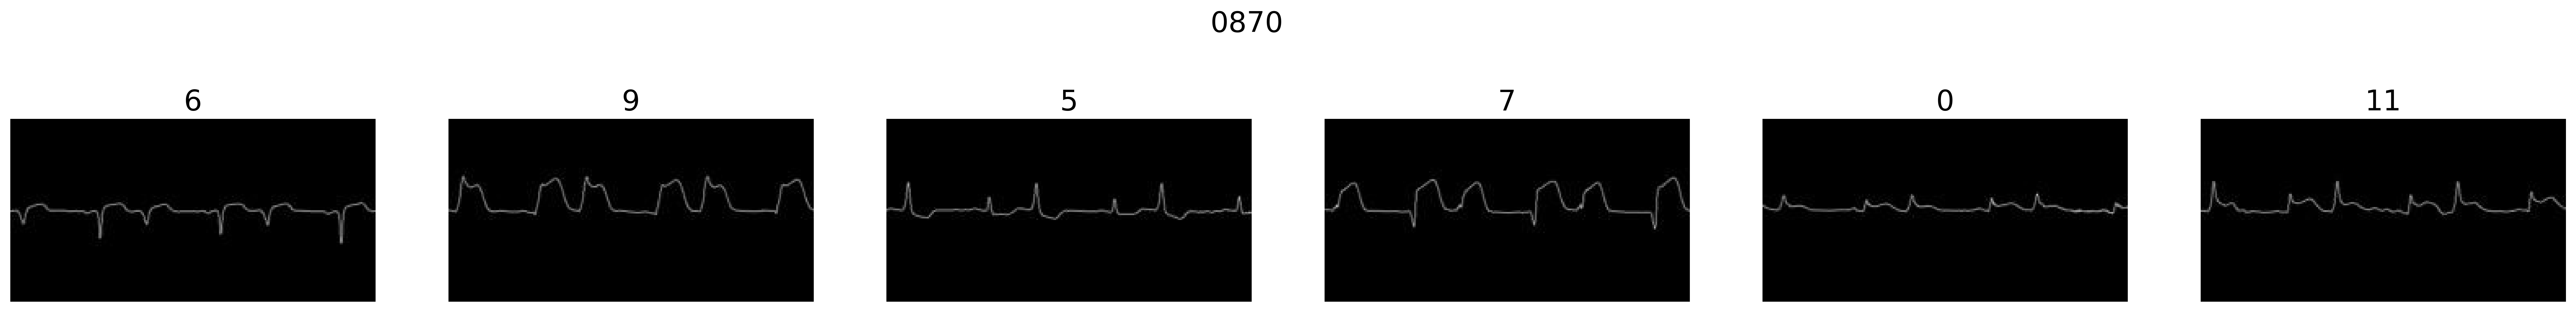

In [13]:
for counter, (images,labels,label_lead,patients,num_leads) in enumerate(train_dataloader, 0):
    #print(images.shape)
    #print(labels)
    #print(label_lead)
    #0がV1,5がV6
    #print(patients)
    #print(num_leads)
    imgs=images[0].reshape(-1,3,112,224)
    patients=patients[0]
    label = label_lead[0].tolist()
    imshow_oneimage(imgs,label,patients)
    break

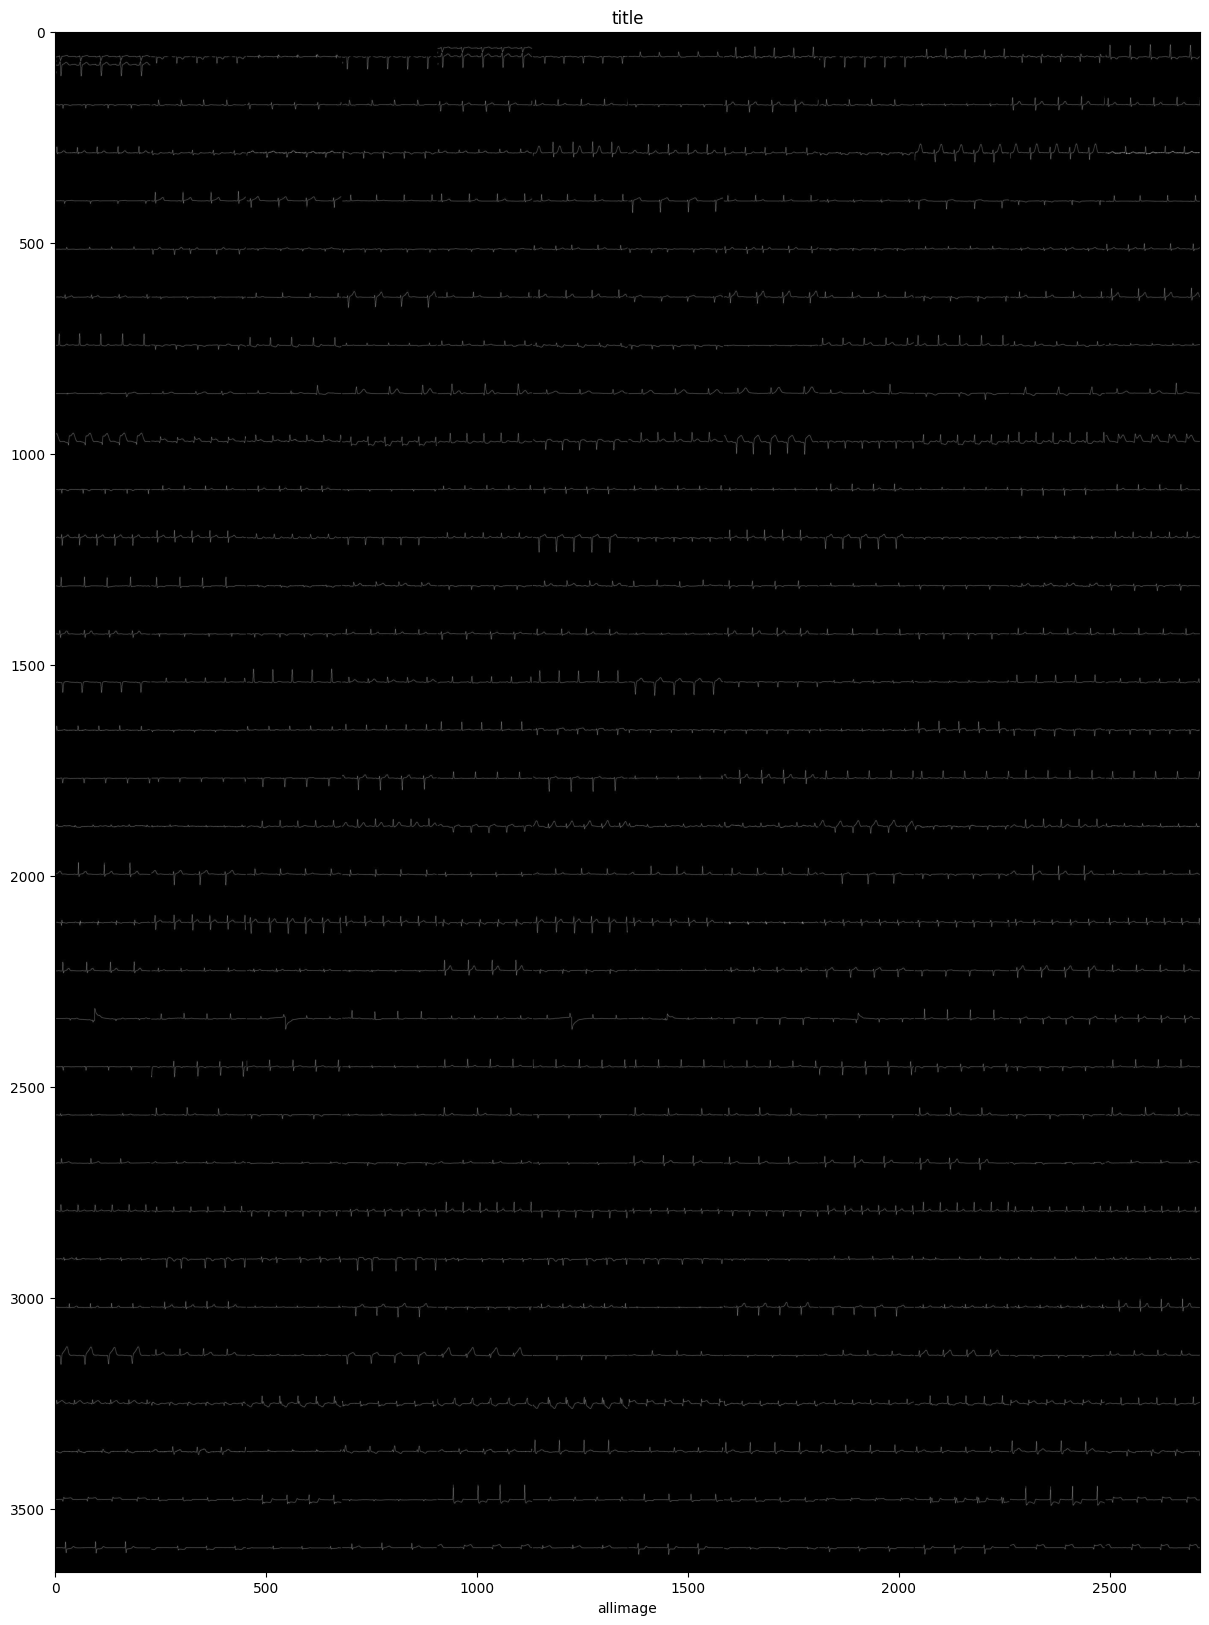

In [14]:
for counter, (images,labels,label_lead,patients,num_leads) in enumerate(train_dataloader, 0):
    #print(images.shape)
    #print(labels)
    #print(label_lead)
    #print(patients){}
    #print(num_leads)
    imgs=images.reshape(-1,3,112,224)
    imshow_allimage(imgs,12,'title','allimage')
    break

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 畳み込み層や全結合層などを定義する
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.faltten = nn.Flatten()
        self.fc1 = nn.Linear(16,16)
        self.fc2 = nn.Linear(16, 12)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.gap(x)
        x = self.faltten(x)
        #x = x.view(-1, 16 * 56 * 112)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルのインスタンスを作成
model = CNNModel().to(device)

In [16]:
print(model)

print(train_dataloader)


CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=1)
  (faltten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
)


In [17]:
print(label_lead.shape)
#print(label_lead)
print(images.shape)

torch.Size([32, 12])
torch.Size([32, 12, 3, 112, 224])


In [18]:
import torch.optim as optim

# 損失関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [19]:
print(images.shape)

torch.Size([32, 12, 3, 112, 224])


In [20]:
from sklearn.metrics import *

In [21]:
num_epochs = 10
import torch.optim as optim

# 損失関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(model.parameters(), lr=0.0001)
bestscore = 1000.0
loss_list,loss_list_test = [], []
f1s, f1s_test = [],[]
acc, acc_test = [], []


for epoch in range(num_epochs):
    model.train()
    running_loss, running_loss_test = 0.0, 0.0
    preds, label =[], []
    preds_test,label_test = [], []

    for ecg_image,labels,label_lead,patients,num_leads in train_dataloader:
        image =ecg_image.reshape(-1,3,112,224).to(device)
        label_lead = label_lead.reshape(-1).to(device)
        optimizer.zero_grad()  # 勾配を初期化

        outputs = model(image)  # モデルの出力を計算
        
        prob, pred=torch.max(outputs,1)
        preds.extend(pred.tolist())
        label.extend(label_lead.tolist())
        loss = criterion(outputs, label_lead)  # 損失を計算
        loss.backward()  # 勾配を計算
        optimizer.step()  # パラメータを更新

        running_loss += loss.item()

    

    for ecg_image,labels,label_lead,patients,num_leads in test_dataloader:
        image =ecg_image.reshape(-1,3,112,224).to(device)
        label_lead = label_lead.reshape(-1).to(device)

        outputs = model(image)  # モデルの出力を計算
        prob, pred=torch.max(outputs,1)
        preds_test.extend(pred.tolist())
        label_test.extend(label_lead.tolist())
        
        #print(outputs)
        loss = criterion(outputs, label_lead)  # 損失を計算


        running_loss_test += loss.item()
    
    score = running_loss_test/len(test_dataloader)
    if score < bestscore:
        bestscore = score
        torch.save(model.state_dict(), '/root/notebooks/sample/models/bestmodel.pth')
        print('best score!!')
    loss_list.append(running_loss/len(train_dataloader))
    loss_list_test.append(running_loss_test/len(test_dataloader))
    f1 = f1_score(preds,label,average='macro')
    f1_test = f1_score(preds_test,label_test,average='macro')
    f1s.append(f1)
    f1s_test.append(f1_test)
    accuracy = accuracy_score(preds,label)
    accuracy_test = accuracy_score(preds_test,label_test)
    acc.append(accuracy)
    acc_test.append(accuracy_test)


    # 1エポック終了時の損失を表示
    print(f"Epoch [{epoch+1}/{num_epochs}] Train-Loss: {running_loss/len(train_dataloader)} Test-Loss: {running_loss_test/len(train_dataloader)} Train-f1: {f1} Test-f1: {f1_test}")


best score!!
Epoch [1/10] Train-Loss: 2.4971869468688963 Test-Loss: 0.7490789651870727 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [2/10] Train-Loss: 2.4967321872711183 Test-Loss: 0.7489476203918457 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [3/10] Train-Loss: 2.4963062047958373 Test-Loss: 0.7488237380981445 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [4/10] Train-Loss: 2.495900583267212 Test-Loss: 0.7487046957015991 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [5/10] Train-Loss: 2.495511507987976 Test-Loss: 0.7485899686813354 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [6/10] Train-Loss: 2.4951318979263304 Test-Loss: 0.7484770774841308 Train-f1: 0.012820512820512822 Test-f1: 0.012820512820512822
best score!!
Epoch [7/10] Train-Loss: 2.4947623014450073 Test-Loss: 0.748369836807251 Train-f1: 0.0128205128205128

In [22]:
print(label_lead.shape)
print(label_lead)
print(preds)
print(len(test_dataloader))

torch.Size([144])
tensor([ 4, 10,  0,  2,  7,  8,  5,  1, 11,  6,  9,  3, 10,  2,  0,  1,  4, 11,
         5,  9,  6,  8,  7,  3,  4,  6,  3,  9,  7,  8,  5, 10,  0,  2,  1, 11,
         2,  1, 10,  5,  7,  6,  4, 11,  0,  8,  3,  9,  8, 10,  3,  4, 11,  1,
         6,  2,  5,  7,  0,  9,  5,  2,  1,  0,  7,  3, 11, 10,  9,  8,  6,  4,
         4, 10,  6,  5,  3,  9,  2,  0,  1,  7, 11,  8, 11,  0,  1, 10,  6,  9,
         2,  4,  8,  3,  5,  7,  0,  1,  5, 11, 10,  8,  7,  2,  4,  6,  9,  3,
        11,  5,  3, 10,  0,  7,  4,  2,  8,  9,  1,  6,  9,  3, 11,  2, 10,  1,
         7,  5,  0,  4,  6,  8, 10,  0,  6,  1,  3,  8,  7,  2,  4,  5, 11,  9],
       device='cuda:0')
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 

In [23]:
pred,label = [],[]
model.load_state_dict(torch.load('/root/notebooks/sample/models/bestmodel.pth'))
model.eval()

for ecg_image,labels,label_lead,patients,num_leads in test_dataloader:
    image =ecg_image.reshape(-1,3,112,224).to(device)
    label_lead = label_lead.reshape(-1).to(device)
    label.extend(label_lead.tolist())
    outputs = model(image)  # モデルの出力を計算
    prob, preds=torch.max(outputs,1)
    pred.extend(preds.tolist())
    f1_test = f1_score(preds.tolist(),label_lead.tolist(),average='macro')
    #print(outputs)
    loss = criterion(outputs, label_lead)  # 損失を計算

    running_loss_test += loss.item()


In [24]:
print(loss_list)

[2.4971869468688963, 2.4967321872711183, 2.4963062047958373, 2.495900583267212, 2.495511507987976, 2.4951318979263304, 2.4947623014450073, 2.4944122314453123, 2.494063305854797, 2.4937096118927]


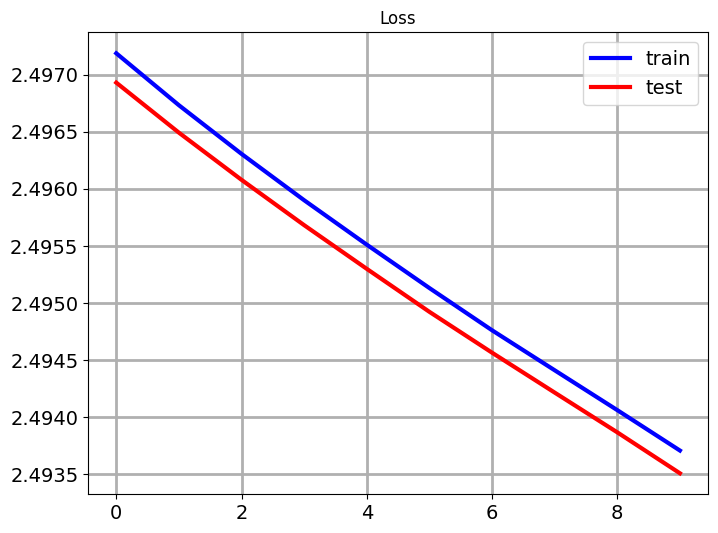

In [25]:
# 学習曲線 (損失関数)
plt.figure(figsize=(8,6))
plt.plot(loss_list,label='train', lw=3, c='b')
plt.plot(loss_list_test,label='test', lw=3, c='r')
plt.title('Loss')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

In [26]:
print(f1s_test)

[0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822, 0.012820512820512822]


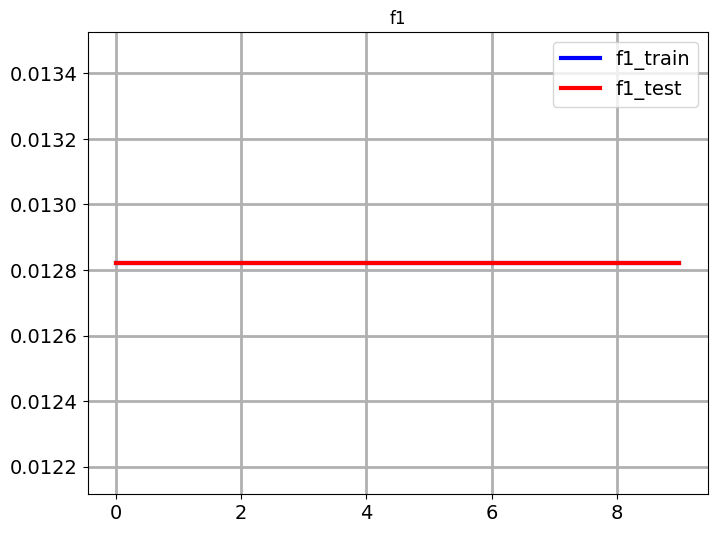

In [27]:

# 学習曲線 (精度)
plt.figure(figsize=(8,6))
plt.plot(f1s,label='f1_train', lw=3, c='b')
plt.plot(f1s_test,label='f1_test', lw=3, c='r')
plt.title('f1')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()


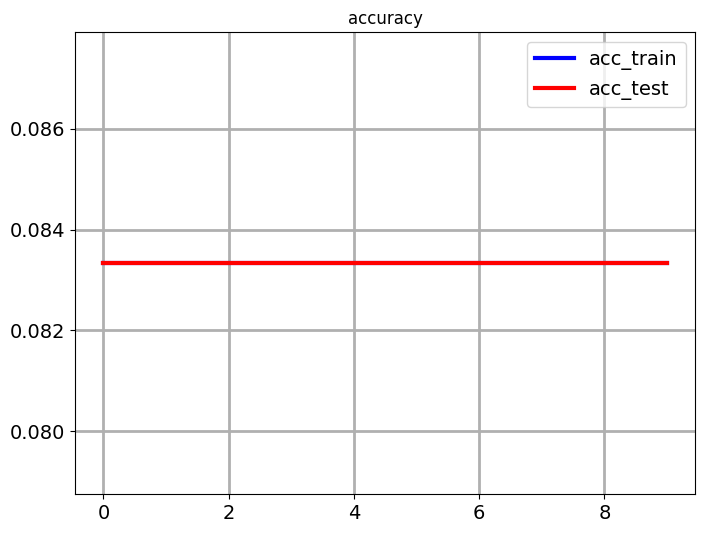

In [28]:

# 学習曲線 (精度)
plt.figure(figsize=(8,6))
plt.plot(acc,label='acc_train', lw=3, c='b')
plt.plot(acc_test,label='acc_test', lw=3, c='r')
plt.title('accuracy')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()


In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
            """
            This function prints and plots the confusion matrix.
            Normalization can be applied by setting `normalize=True`.
            """
            if normalize:
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                print("Normalized confusion matrix")
            else:
                print('Confusion matrix, without normalization')
            print(cm)
            plt.imshow(cm, interpolation='nearest', cmap=cmap)
            plt.title(title)
            plt.colorbar()
            tick_marks = np.arange(len(classes))
            plt.xticks(tick_marks, classes, rotation=45)
            plt.yticks(tick_marks, classes)
            fmt = '.2f' if normalize else 'd'
            thresh = cm.max() / 2.
            for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            #plt.savefig(output_file)

Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]
 [ 0  0  0  0  0  0  0  0  0  0  0 76]]


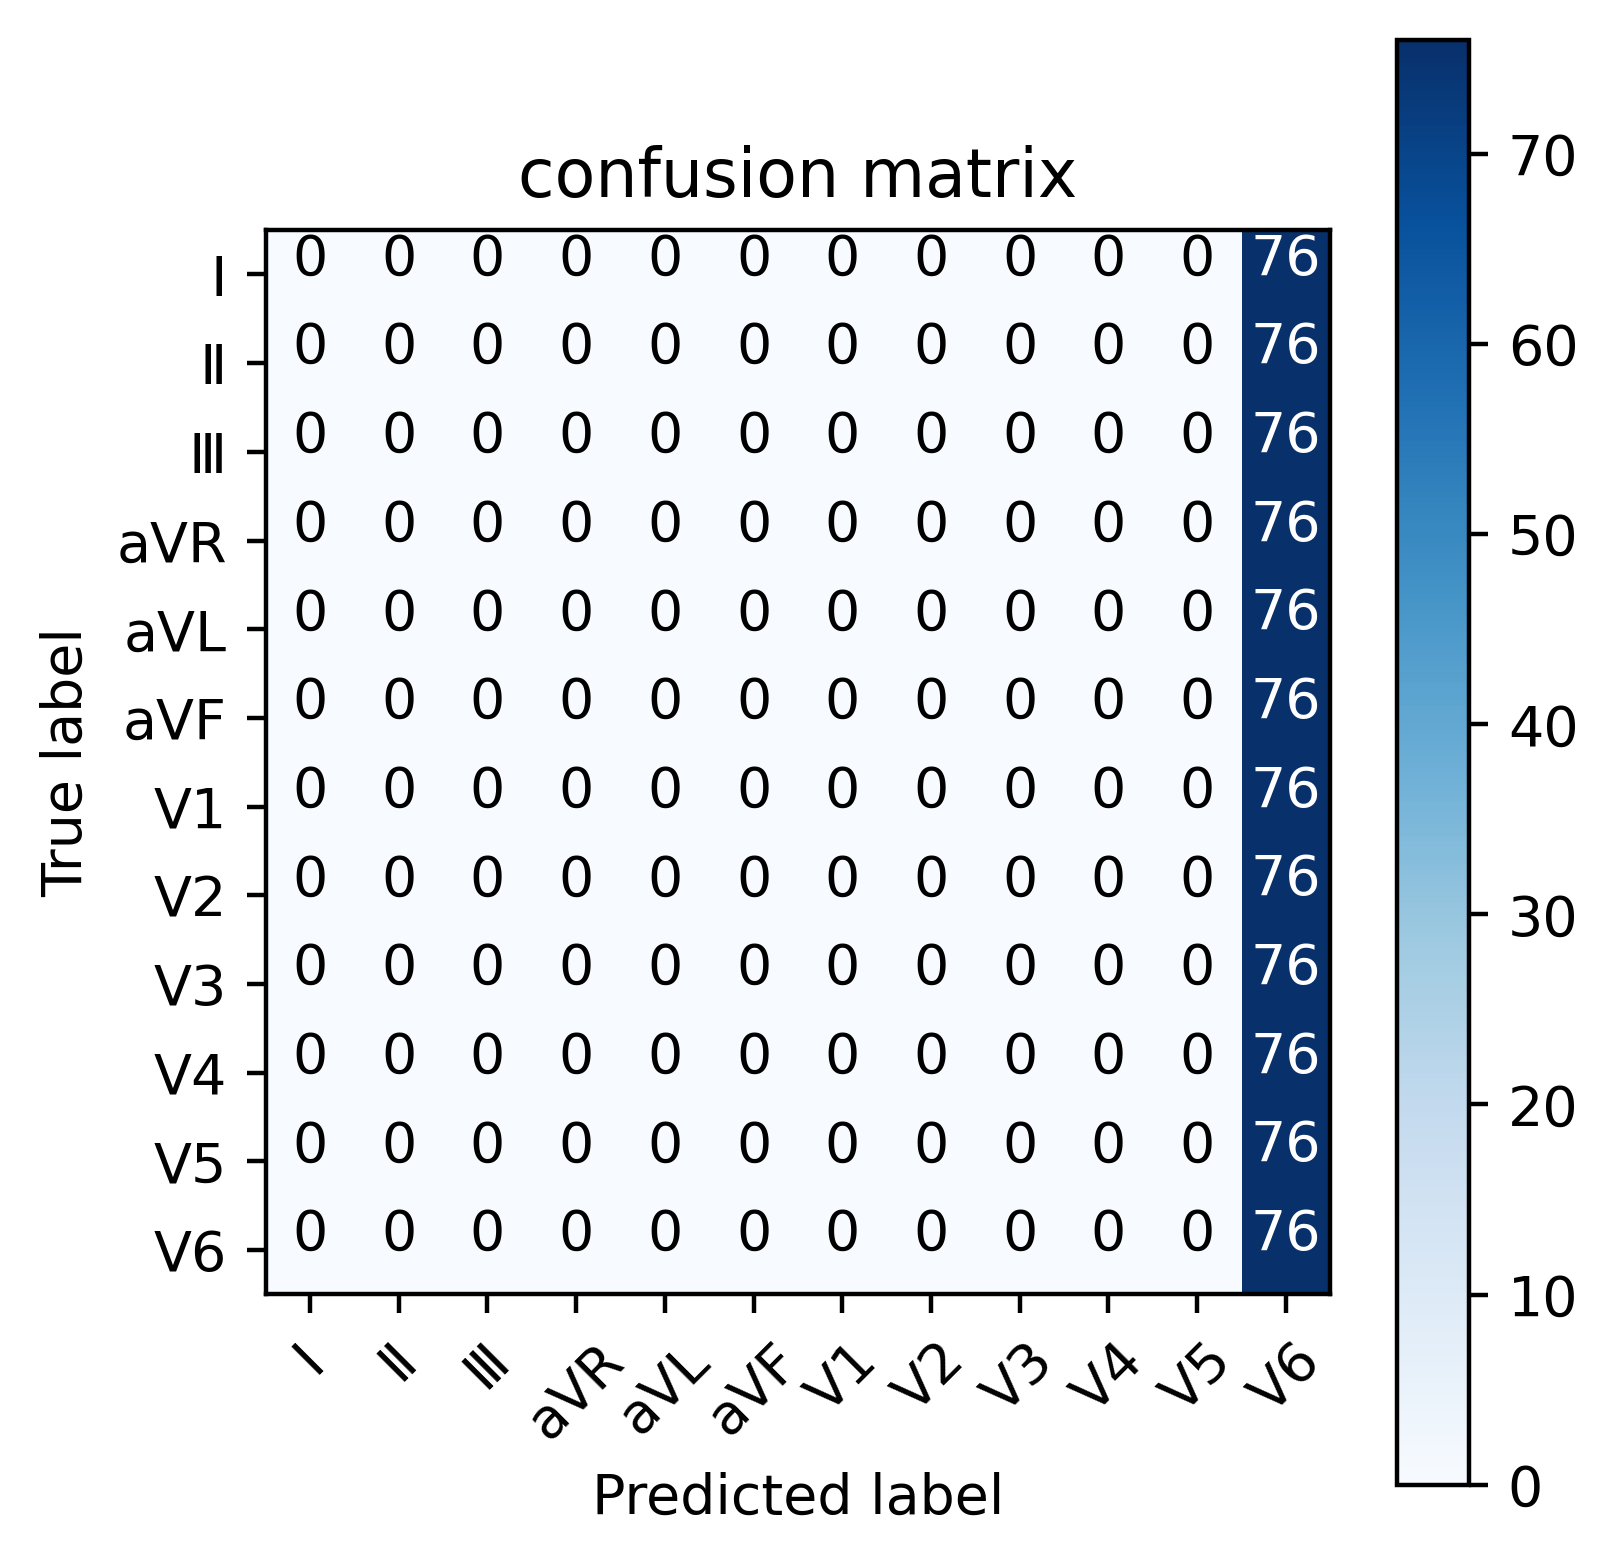

In [30]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11]
label2=['Ⅰ','Ⅱ','Ⅲ','aVR','aVL','aVF','V1', 'V2', 'V3', 'V4', 'V5','V6']
cnf_matrix=confusion_matrix(label,pred,labels=labels)
title="confusion matrix"
plt.figure(figsize=(4,4),dpi=400)
plot_confusion_matrix(cnf_matrix, classes=label2,title=title)
plt.show()